In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, minmax_scale
from google.colab.patches import cv2_imshow
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tempfile import TemporaryFile

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
data['slice_file_name'] = data['slice_file_name'].str.replace('wav','png')


In [5]:
# Create the labels dataset
y = data.loc[:,'class']
y

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [7]:
y

array([3, 2, 2, ..., 1, 1, 1])

In [8]:
z = data.loc[:,'slice_file_name']
z

0         100032-3-0-0.png
1       100263-2-0-117.png
2       100263-2-0-121.png
3       100263-2-0-126.png
4       100263-2-0-137.png
               ...        
8727       99812-1-2-0.png
8728       99812-1-3-0.png
8729       99812-1-4-0.png
8730       99812-1-5-0.png
8731       99812-1-6-0.png
Name: slice_file_name, Length: 8732, dtype: object

In [29]:
counter=0
result_img_matrix= []
X_train = []
y1 = []

for x in z:
 
 
 img_name = data.loc[counter,'slice_file_name']
 folder_name = data.loc[counter,'classID']

 file_way=f'/content/drive/MyDrive/spectrograms/{folder_name}/{img_name}'
 image = cv2.imread(file_way)
 #pixelated = image[::10, ::10]
 X_train.append (image/255)
 
 y1.append([y[counter]])
 counter=counter+1

#print('X_train shape:', np.array(X_train).shape)
#print('X_train shape:', np.array(y1).shape)


In [ ]:

X_val = X_train[6986:7859]
y_val = y1[6986:7859]

X_test = X_train[7859:]
y_test = y1[7859:]

X_train = X_train[:6986]
y_train = y1[:6986]


In [ ]:

X_val = X_train[6986:7859]
y_val = y1[6986:7859]

X_test = X_train[7859:]
y_test = y1[7859:]


X_train = X_train[:6986]
y_train = y1[:6986]


In [2]:

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")


X_val: 876
y_val: 876
X_test: 876
y_test: 876
X_train: 6986
y_train: 6986


In [ ]:

model = tf.keras.Sequential()

In [ ]:

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(374,500,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:

model.add(tf.keras.layers.Flatten())

In [ ]:

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
print('X_train shape:', np.array(X_train).shape)
print('y_train shape:', np.array(y_train).shape)

X_train shape: (800, 374, 500, 3)
y_train shape: (800, 1)


In [ ]:
y_train

[[3],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [3],
 [3],
 [3],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [3],
 [3],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [9],
 [9],
 [9],
 [9],
 [9],
 [9],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [6],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [5],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8]

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 374, 500, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 187, 250, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 187, 250, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 125, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 125, 64)       36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 93, 125, 64)       3

In [ ]:

results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
7/7 [==============================] - 28s 2s/step - loss: 2.5462 - accuracy: 0.2050 - val_loss: 2.6698 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 6s 785ms/step - loss: 2.0541 - accuracy: 0.2725 - val_loss: 2.2979 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 6s 787ms/step - loss: 1.9202 - accuracy: 0.3150 - val_loss: 2.3365 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 6s 791ms/step - loss: 1.7885 - accuracy: 0.3475 - val_loss: 2.1464 - val_accuracy: 0.1200
Epoch 5/100
7/7 [==============================] - 6s 789ms/step - loss: 1.6569 - accuracy: 0.3938 - val_loss: 2.0343 - val_accuracy: 0.1900
Epoch 6/100
7/7 [==============================] - 6s 797ms/step - loss: 1.5236 - accuracy: 0.4412 - val_loss: 2.1650 - val_accuracy: 0.4000
Epoch 7/100
7/7 [==============================] - 6s 801ms/step - loss: 1.4260 - accuracy: 0.4675 - val_loss: 1.8972 - val_accuracy: 0.3500
Epo

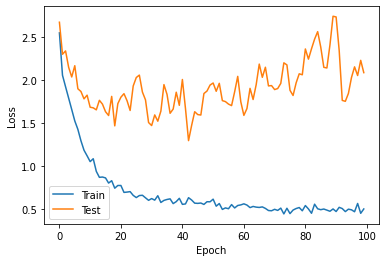

In [ ]:

plt.plot(results.history['loss'], label='Train')

plt.plot(results.history['val_loss'], label='Test')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

plt.show()

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:

test_result = model.test_on_batch(X_test, y_test)

print(test_result)

[8.680509567260742, 0.4099999964237213]
